# Paso 1:
Abrir nuestro csv con la información moldeada y convertir el formato de la columna date a datetime

In [76]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import datetime as dt

In [77]:
btc_df = pd.read_csv('../csv_files/btc_mxn_db.csv')

In [78]:
btc_df

,Date,24h Average,12h Average,Last,Volume (BTC)
0,2014-04-15,6762.23,6864.03,7500.00,10.540000
1,2014-04-16,6900.09,6892.85,7128.84,11.770000
2,2014-04-17,7126.44,6917.98,6985.55,5.760000
3,2014-04-18,6909.36,6874.22,6679.72,3.700000
4,2014-04-19,6889.90,6889.71,7041.87,1.530000
...,...,...,...,...,...
1910,2019-12-07,150788.19,150610.99,153071.38,2.897516
1911,2019-12-08,151271.67,152582.02,153047.95,1.480131
1912,2019-12-09,145530.12,145298.81,146289.83,8.048404
1913,2019-12-10,146385.56,145321.43,139013.01,5.670937


In [80]:
btc_df.Date = btc_df.Date.astype('datetime64')

In [82]:
btc_df.head()

,Date,24h Average,12h Average,Last,Volume (BTC)
0,2014-04-15,6762.23,6864.03,7500.00,10.54
1,2014-04-16,6900.09,6892.85,7128.84,11.77
2,2014-04-17,7126.44,6917.98,6985.55,5.76
3,2014-04-18,6909.36,6874.22,6679.72,3.70
4,2014-04-19,6889.90,6889.71,7041.87,1.53


# Paso 2:

Utilizando prophet de Fb con cada una de las columnas de precios

## Utilizando 24h_avg

In [83]:
#Seleccionando las columnas necesarias para utilizar con prophet
df = btc_df[['Date', 'Last']].copy()

In [99]:
#Cambiando el nombre de las columnas al formato requerido por prophet
df.rename(columns={'Date': 'ds', 'Last': 'y'}, inplace=True)

In [85]:
help(Prophet)

Help on class Prophet in module fbprophet.forecaster:

class Prophet(builtins.object)
 |  Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000)
 |  
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear' or 'logistic' to specify a linear or logistic
 |      trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selected uniformly from
 |      the 

In [132]:
#Entrenando el modelo
mod = Prophet(growth='linear', changepoint_prior_scale=0.01)
mod.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [133]:
future = mod.make_future_dataframe(periods=60)
future.head()

,ds
0,2014-04-15
1,2014-04-16
2,2014-04-17
3,2014-04-18
4,2014-04-19


In [134]:
forecast = mod.predict(future)

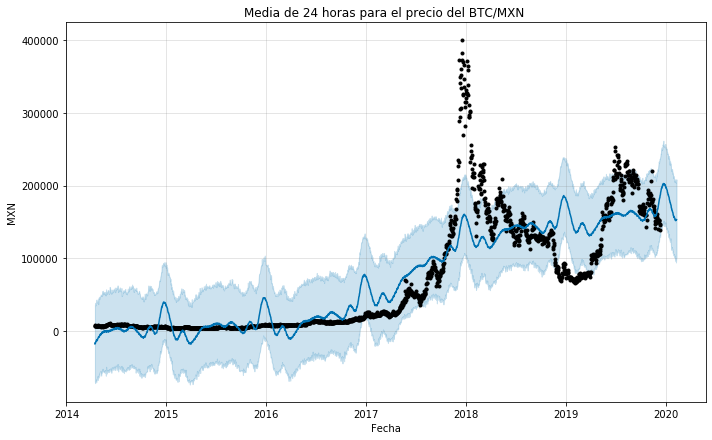

In [135]:
mod.plot(forecast, uncertainty=True)
plt.title('Media de 24 horas para el precio del BTC/MXN ')
plt.xlabel('Fecha')
plt.ylabel('MXN')

plt.show()

In [136]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][1915:]

,ds,yhat,yhat_lower,yhat_upper
1915,2019-12-12,187202.033260,132933.855024,240850.768040
1916,2019-12-13,190567.076392,141261.938721,244250.261900
1917,2019-12-14,192139.381850,138631.136342,243900.902037
1918,2019-12-15,194454.814195,140366.217114,251058.418256
1919,2019-12-16,196378.444415,144785.814902,248707.579064
1920,2019-12-17,196065.313630,140857.669777,252873.472352
1921,2019-12-18,198303.971224,146551.459944,249746.696912
1922,2019-12-19,198334.116437,147947.682419,249969.509987
1923,2019-12-20,200626.126148,146986.809488,256621.801653
1924,2019-12-21,201051.556764,145382.591793,255555.773839


## Utilizando 12h_avg

In [12]:
#Seleccionando las columnas necesarias para utilizar con prophet
btc_12h_avg = btc_df[['date', '12h_avg']].copy()

#Cambiando el nombre de las columnas al formato requerido por prophet
btc_12h_avg.rename(columns={'date': 'ds', '12h_avg': 'y'}, inplace=True)

#Entrenando el modelo
mod12 = Prophet(growth='linear', n_changepoints=150)
mod12.fit(btc_12h_avg)

#Creando el nuevo dataframe con las fechas a predecir
future12 = mod12.make_future_dataframe(periods=60)
future12.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
403,2020-02-08
404,2020-02-09
405,2020-02-10
406,2020-02-11
407,2020-02-12


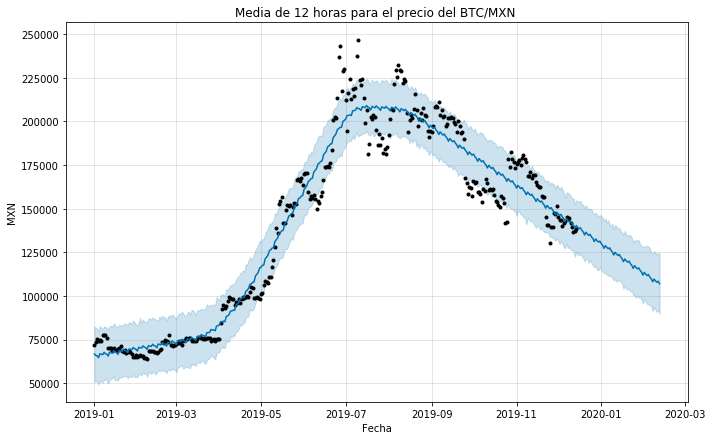

In [13]:
#Prediciendo los precios del nuevo dataframe
forecast12 = mod12.predict(future12)

#Creando gráfico de la predicción
mod12.plot(forecast12, uncertainty=True)
plt.title('Media de 12 horas para el precio del BTC/MXN ')
plt.xlabel('Fecha')
plt.ylabel('MXN')
plt.show()

In [14]:
#Revisando las ultimas columnas del modelo
forecast12[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
403,2020-02-08,109678.748601,93603.735815,125709.656865
404,2020-02-09,108704.595678,92152.055809,124856.518873
405,2020-02-10,107853.066525,90853.103139,123696.062244
406,2020-02-11,108434.254363,91889.377963,124784.924799
407,2020-02-12,106978.193259,89728.459154,124280.249896


In [23]:
forecast12.loc[forecast12['ds']== dt.date.today()]

/home/reynaldo/Desktop/DataAnalytics/proyectos/proyectos/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
350,2019-12-17,138116.285937,124333.68397,154555.226094,138058.020147,138171.323259,1006.178292,1006.178292,1006.178292,1006.178292,1006.178292,1006.178292,0.0,0.0,0.0,139122.464229


## Utilizando el mínimo

In [15]:
#Seleccionando las columnas necesarias para utilizar con prophet
btc_min = btc_df[['date', 'min']].copy()

#Cambiando el nombre de las columnas al formato requerido por prophet
btc_min.rename(columns={'date': 'ds', 'min': 'y'}, inplace=True)

#Entrenando el modelo
mod_min = Prophet(growth='linear', n_changepoints=150)
mod_min.fit(btc_min)

#Creando el nuevo dataframe con las fechas a predecir
future_min = mod_min.make_future_dataframe(periods=60)
future_min.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
403,2020-02-08
404,2020-02-09
405,2020-02-10
406,2020-02-11
407,2020-02-12


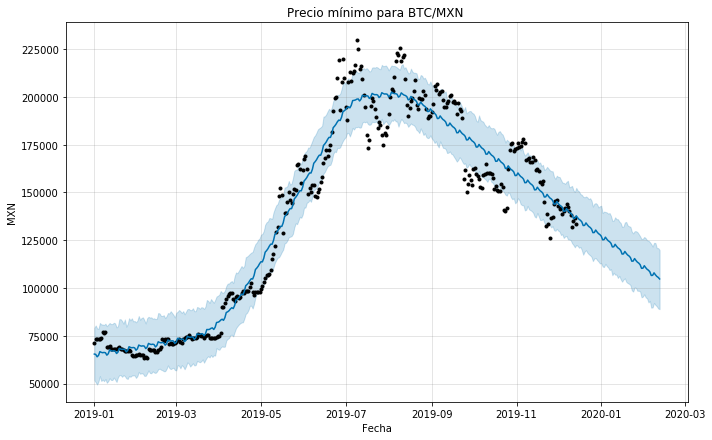

In [16]:
#Prediciendo los precios del nuevo dataframe
forecast_min = mod_min.predict(future_min)

#Creando gráfico de la predicción
mod_min.plot(forecast_min, uncertainty=True)
plt.title('Precio mínimo para BTC/MXN ')
plt.xlabel('Fecha')
plt.ylabel('MXN')
plt.show()

In [17]:
#Revisando las ultimas columnas del modelo
forecast_min[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
403,2020-02-08,107956.721156,92226.459733,123648.597085
404,2020-02-09,106931.236494,91151.166810,123592.548272
405,2020-02-10,106083.710162,90444.882894,120892.920688
406,2020-02-11,105579.694212,89297.803887,120901.338189
407,2020-02-12,104750.589280,88935.013010,119951.678532


In [24]:
forecast_min.loc[forecast_min['ds']== dt.date.today()]

/home/reynaldo/Desktop/DataAnalytics/proyectos/proyectos/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
350,2019-12-17,135160.086311,121489.529944,149190.874204,135106.826566,135213.152862,287.278036,287.278036,287.278036,287.278036,287.278036,287.278036,0.0,0.0,0.0,135447.364347


## Utilizando el máximo


In [18]:
#Seleccionando las columnas necesarias para utilizar con prophet
btc_max = btc_df[['date', 'max']].copy()

#Cambiando el nombre de las columnas al formato requerido por prophet
btc_max.rename(columns={'date': 'ds', 'max': 'y'}, inplace=True)

#Entrenando el modelo
mod_max = Prophet(growth='linear', n_changepoints=150)
mod_max.fit(btc_max)

#Creando el nuevo dataframe con las fechas a predecir
future_max = mod_max.make_future_dataframe(periods=60)
future_max.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
403,2020-02-08
404,2020-02-09
405,2020-02-10
406,2020-02-11
407,2020-02-12


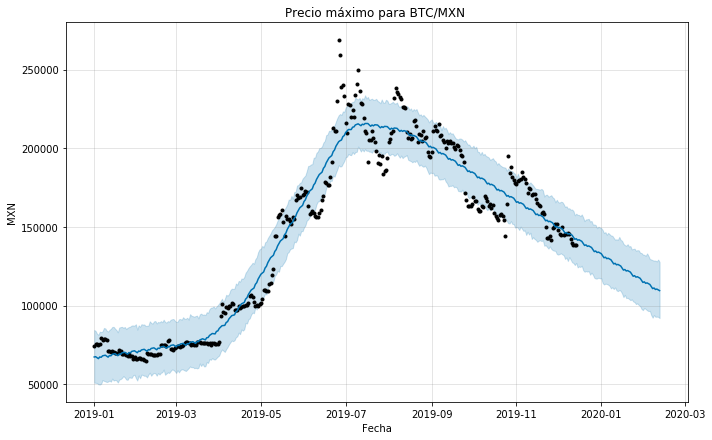

In [19]:
#Prediciendo los precios del nuevo dataframe
forecast_max = mod_max.predict(future_min)

#Creando gráfico de la predicción
mod_max.plot(forecast_max, uncertainty=True)
plt.title('Precio máximo para BTC/MXN ')
plt.xlabel('Fecha')
plt.ylabel('MXN')
plt.show()

In [20]:
#Revisando las ultimas columnas del modelo
forecast_max[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
403,2020-02-08,111174.010089,93982.750569,128597.787312
404,2020-02-09,110247.033194,92865.381634,128606.875355
405,2020-02-10,110505.175223,92971.452658,128061.979244
406,2020-02-11,110014.156850,92839.722896,129266.000680
407,2020-02-12,109511.411119,92027.986626,127724.422895


In [25]:
forecast_max.loc[forecast_max['ds']== dt.date.today()]

/home/reynaldo/Desktop/DataAnalytics/proyectos/proyectos/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
350,2019-12-17,140835.15376,124554.31443,156839.650731,140767.933756,140889.470946,503.416456,503.416456,503.416456,503.416456,503.416456,503.416456,0.0,0.0,0.0,141338.570216
